# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split 
from  sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from  sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import ParameterGrid

# Reading in the Data

In [2]:
df = pd.read_csv('/Users/radhikamehrotra/Documents/DATA1030-Fall2021/SeoulBikeData.csv', encoding="ISO-8859-1")
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
#Shuffling around some columns in the dataset to get the Target variable as the last column
df = df[['Date','Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count']]
df

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,254
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,204
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,173
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,107
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1003
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,764
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,694
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,712


In [4]:
#Transforming string type Date to datetime 
df.Date = pd.to_datetime(df.Date,dayfirst = True)

# EDA 

## Analyzing Rows and Columns

In [5]:
#Shape of datat (number of rows and columns)
print(df.shape)
print(df.columns)

(8760, 14)
Index(['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count'],
      dtype='object')


In [6]:
#column data types
df.dtypes

Date                         datetime64[ns]
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
Rented Bike Count                     int64
dtype: object

In [7]:
#Determining if the columns are continuous or categorical (using code written in my previous HW)
catcontdict = {}
for i in range(len(df.columns)):   
        count = 0
        for value in (df[df.columns[i]]).value_counts(normalize = True):
            if value < 0.05:
                count += 1
                
        if count > 0.8 * len (df[df.columns[i]].value_counts()) and len (df[df.columns[i]].value_counts()) > 10:
            catcontdict[df.columns[i]] = "Continuous"
        else:
            catcontdict[df.columns[i]] = "Categorical"
            
print(catcontdict) 

{'Date': 'Continuous', 'Hour': 'Continuous', 'Temperature(°C)': 'Continuous', 'Humidity(%)': 'Continuous', 'Wind speed (m/s)': 'Continuous', 'Visibility (10m)': 'Continuous', 'Dew point temperature(°C)': 'Continuous', 'Solar Radiation (MJ/m2)': 'Continuous', 'Rainfall(mm)': 'Continuous', 'Snowfall (cm)': 'Continuous', 'Seasons': 'Categorical', 'Holiday': 'Categorical', 'Functioning Day': 'Categorical', 'Rented Bike Count': 'Continuous'}


## Analyzing Target Variable

In [8]:
#General statistics of target variable 'Y'
df['Rented Bike Count'].value_counts()

0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64

In [9]:
df['Rented Bike Count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64

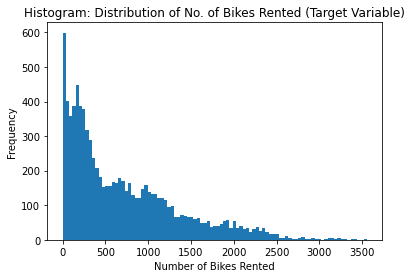

In [10]:
#Plotting histogram for Target variable
df['Rented Bike Count'].plot.hist(bins = int(np.sqrt(df.shape[0])))
plt.title('Histogram: Distribution of No. of Bikes Rented (Target Variable)')
plt.xlabel('Number of Bikes Rented')
plt.show()

## Analyzing each feature variable

### 1. Date

In [11]:
df["Date"].value_counts().sort_index()

2017-12-01    24
2017-12-02    24
2017-12-03    24
2017-12-04    24
2017-12-05    24
              ..
2018-11-26    24
2018-11-27    24
2018-11-28    24
2018-11-29    24
2018-11-30    24
Name: Date, Length: 365, dtype: int64

In [12]:
df["Date"].describe()

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/1302155438.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["Date"].describe()


count                    8760
unique                    365
top       2017-12-01 00:00:00
freq                       24
first     2017-12-01 00:00:00
last      2018-11-30 00:00:00
Name: Date, dtype: object

### 2. Hour of the Day

In [13]:
df["Hour"].value_counts().sort_index()

0     365
1     365
2     365
3     365
4     365
5     365
6     365
7     365
8     365
9     365
10    365
11    365
12    365
13    365
14    365
15    365
16    365
17    365
18    365
19    365
20    365
21    365
22    365
23    365
Name: Hour, dtype: int64

### 3. Temperature in degree celsius

In [14]:
df["Temperature(°C)"].value_counts().sort_index()

-17.8    1
-17.5    2
-17.4    1
-16.9    1
-16.5    1
        ..
 38.0    1
 38.7    1
 39.0    1
 39.3    1
 39.4    1
Name: Temperature(°C), Length: 546, dtype: int64

In [15]:
df["Temperature(°C)"].describe()

count    8760.000000
mean       12.882922
std        11.944825
min       -17.800000
25%         3.500000
50%        13.700000
75%        22.500000
max        39.400000
Name: Temperature(°C), dtype: float64

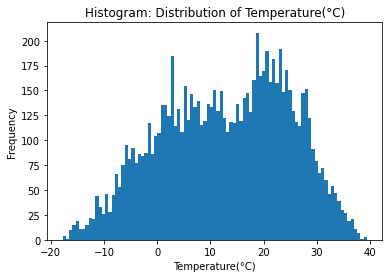

In [16]:
#Plotting histogram for Temperature
df['Temperature(°C)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Temperature(°C)')
plt.xlabel('Temperature(°C)')
plt.show()

### 4. Humidity (%)

In [17]:
df["Humidity(%)"].value_counts().sort_index()

0      17
10      1
11      1
12      1
13      3
     ... 
94     54
95     68
96    111
97    173
98     50
Name: Humidity(%), Length: 90, dtype: int64

In [18]:
df["Humidity(%)"].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity(%), dtype: float64

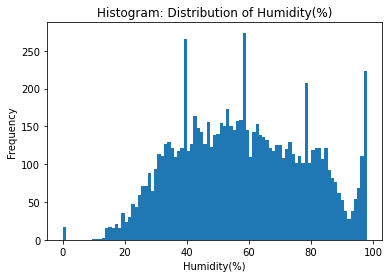

In [19]:
#Plotting histogram for Humidity
df['Humidity(%)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Humidity(%)')
plt.xlabel('Humidity(%)')
plt.show()

### 5. Wind speed (m/s)

In [20]:
df["Wind speed (m/s)"].value_counts().sort_index()

0.0     74
0.1     49
0.2     86
0.3    158
0.4    186
      ... 
6.7      1
6.9      1
7.2      1
7.3      1
7.4      1
Name: Wind speed (m/s), Length: 65, dtype: int64

In [21]:
df["Wind speed (m/s)"].describe()

count    8760.000000
mean        1.724909
std         1.036300
min         0.000000
25%         0.900000
50%         1.500000
75%         2.300000
max         7.400000
Name: Wind speed (m/s), dtype: float64

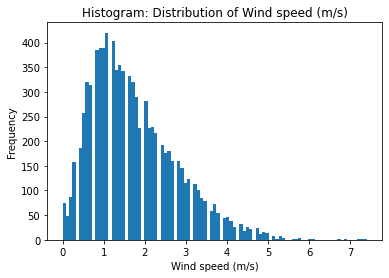

In [22]:
#Plotting histogram for Wind Speed
df['Wind speed (m/s)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Wind speed (m/s)')
plt.xlabel('Wind speed (m/s)')
plt.show()

### 6. Visibility (10m)

In [23]:
df["Visibility (10m)"].value_counts().sort_index()

27         1
33         1
34         1
38         1
53         1
        ... 
1996      27
1997      22
1998      25
1999      28
2000    2245
Name: Visibility (10m), Length: 1789, dtype: int64

In [24]:
df["Visibility (10m)"].describe()

count    8760.000000
mean     1436.825799
std       608.298712
min        27.000000
25%       940.000000
50%      1698.000000
75%      2000.000000
max      2000.000000
Name: Visibility (10m), dtype: float64

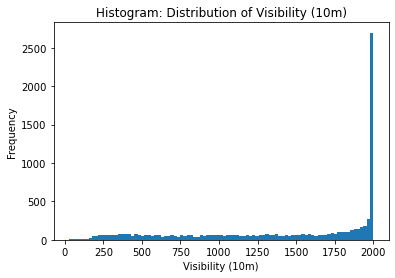

In [25]:
#Plotting histogram for Visibility (10m)
df['Visibility (10m)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Temperature(°C)'].plot.hist(bins  = df['Temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Visibility (10m)')
plt.xlabel('Visibility (10m)')
plt.show()

### 7. Dew Point Temperature in degree celsius

In [26]:
df["Dew point temperature(°C)"].value_counts().sort_index()

-30.6    1
-30.5    1
-29.8    1
-29.7    1
-29.6    2
        ..
 26.1    3
 26.3    1
 26.6    1
 26.8    2
 27.2    1
Name: Dew point temperature(°C), Length: 556, dtype: int64

In [27]:
df["Dew point temperature(°C)"].describe()

count    8760.000000
mean        4.073813
std        13.060369
min       -30.600000
25%        -4.700000
50%         5.100000
75%        14.800000
max        27.200000
Name: Dew point temperature(°C), dtype: float64

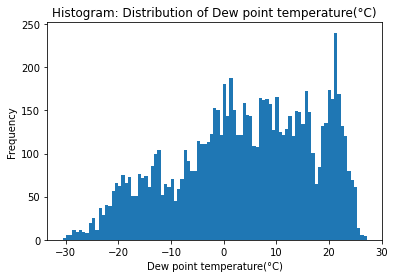

In [28]:
#Plotting histogram for Dew point temperature(°C)
df['Dew point temperature(°C)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Dew point temperature(°C)'].plot.hist(bins  = df['Dew point temperature(°C)'].nunique())                       
plt.title('Histogram: Distribution of Dew point temperature(°C)')
plt.xlabel('Dew point temperature(°C)')
plt.show()

### 8. Solar Radiation

In [29]:
df["Solar Radiation (MJ/m2)"].value_counts().sort_index()

0.00    4300
0.01     128
0.02      82
0.03      69
0.04      47
        ... 
3.42       4
3.44       1
3.45       1
3.49       1
3.52       2
Name: Solar Radiation (MJ/m2), Length: 345, dtype: int64

In [30]:
df["Solar Radiation (MJ/m2)"].describe()

count    8760.000000
mean        0.569111
std         0.868746
min         0.000000
25%         0.000000
50%         0.010000
75%         0.930000
max         3.520000
Name: Solar Radiation (MJ/m2), dtype: float64

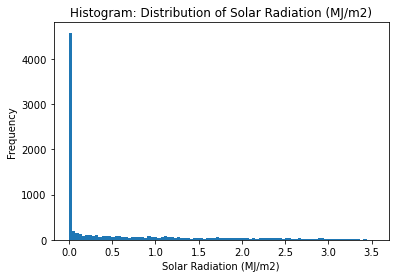

In [31]:
#Plotting histogram for Solar Radiation (MJ/m2)
df['Solar Radiation (MJ/m2)'].plot.hist(bins = int(np.sqrt(df.shape[0])))
#df['Solar Radiation (MJ/m2)'].plot.hist(bins  = df['Solar Radiation (MJ/m2)'].nunique())                       
plt.title('Histogram: Distribution of Solar Radiation (MJ/m2)')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.show()

### 9. Rainfall

In [32]:
df["Rainfall(mm)"].value_counts().sort_index()

0.0     8232
0.1       46
0.2       20
0.3        9
0.4       16
        ... 
21.0       1
21.5       1
24.0       1
29.5       1
35.0       1
Name: Rainfall(mm), Length: 61, dtype: int64

In [33]:
df["Rainfall(mm)"].describe()

count    8760.000000
mean        0.148687
std         1.128193
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        35.000000
Name: Rainfall(mm), dtype: float64

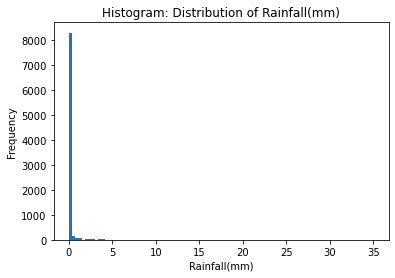

In [34]:
#Plotting histogram for Rainfall(mm)
df['Rainfall(mm)'].plot.hist(bins = int(np.sqrt(df.shape[0])))                    
plt.title('Histogram: Distribution of Rainfall(mm)')
plt.xlabel('Rainfall(mm)')
plt.show()

### 10. Snowfall

In [35]:
df["Snowfall (cm)"].value_counts()

0.0    8317
0.3      42
1.0      39
0.9      34
0.5      34
0.7      31
0.8      22
2.0      22
0.4      21
1.6      19
2.2      18
0.2      15
0.6      15
3.5      14
2.6      12
2.5      10
1.2       8
2.7       6
1.8       5
3.0       5
4.0       4
4.1       4
3.2       4
1.3       4
3.7       3
3.3       3
1.1       3
3.8       3
2.3       3
2.1       3
1.9       3
1.7       3
2.4       3
3.4       2
8.8       2
2.8       2
2.9       2
0.1       2
5.0       2
4.8       2
1.4       2
3.9       2
4.3       2
5.1       1
1.5       1
3.1       1
7.1       1
7.0       1
6.0       1
3.6       1
4.2       1
Name: Snowfall (cm), dtype: int64

In [36]:
df["Snowfall (cm)"].describe()

count    8760.000000
mean        0.075068
std         0.436746
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.800000
Name: Snowfall (cm), dtype: float64

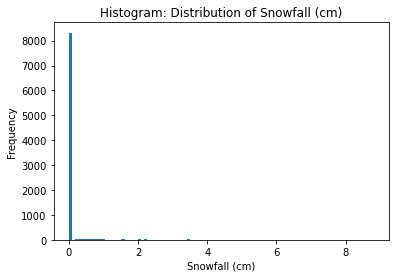

In [37]:
#Plotting histogram forSnowfall (cm)
df['Snowfall (cm)'].plot.hist(bins = int(np.sqrt(df.shape[0])))                     
plt.title('Histogram: Distribution of Snowfall (cm)')
plt.xlabel('Snowfall (cm)')
plt.show()

### 11. Seasons 

In [38]:
df["Seasons"].value_counts().sort_index()

Autumn    2184
Spring    2208
Summer    2208
Winter    2160
Name: Seasons, dtype: int64

In [39]:
df["Seasons"].describe()

count       8760
unique         4
top       Spring
freq        2208
Name: Seasons, dtype: object

### 12. Holiday

In [40]:
df["Holiday"].value_counts().sort_index()

Holiday        432
No Holiday    8328
Name: Holiday, dtype: int64

In [41]:
df["Holiday"].describe()

count           8760
unique             2
top       No Holiday
freq            8328
Name: Holiday, dtype: object

### 13. Functioning Day

In [42]:
df["Functioning Day"].value_counts().sort_index()

No      295
Yes    8465
Name: Functioning Day, dtype: int64

In [43]:
df["Functioning Day"].describe()

count     8760
unique       2
top        Yes
freq      8465
Name: Functioning Day, dtype: object

## Scatter Matrix

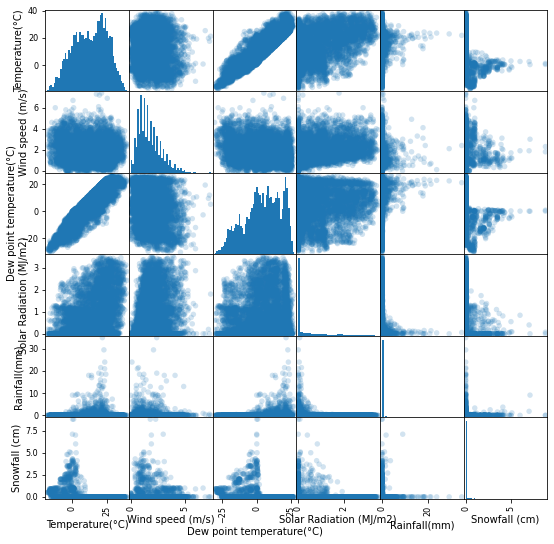

In [44]:
#Plotting all the possible combinations of the features against eachother for EDA
pd.plotting.scatter_matrix(df.select_dtypes(float), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.2)
plt.show()

## Analyzing different relationships between target variable and features

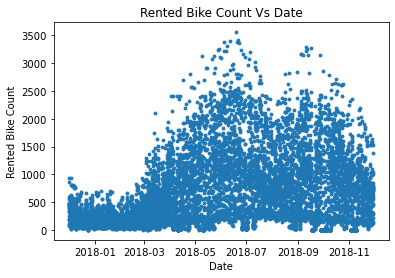

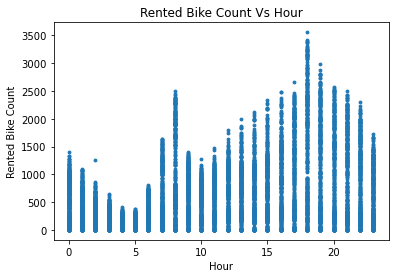

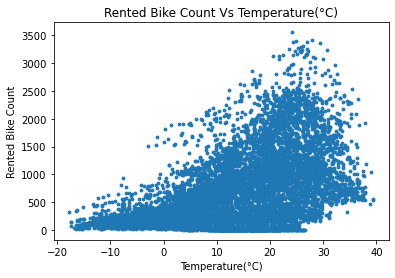

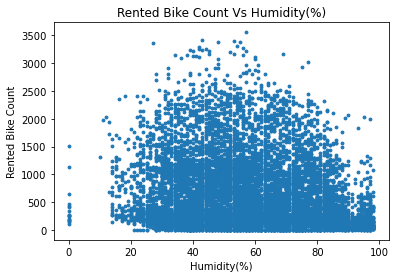

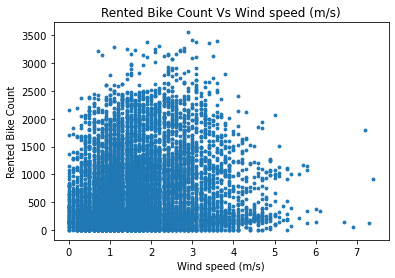

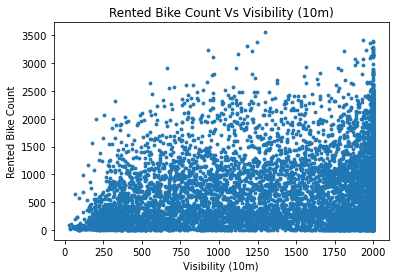

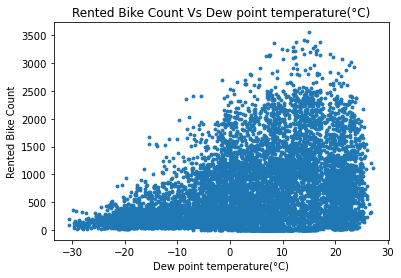

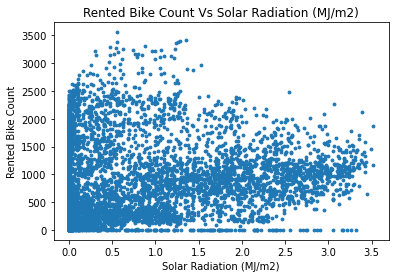

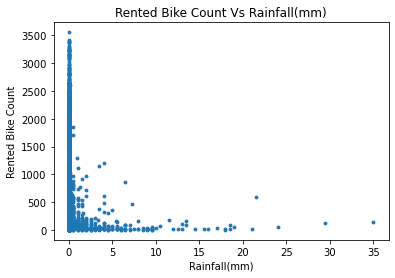

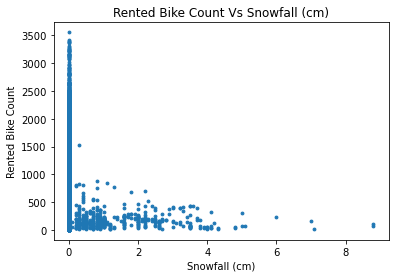

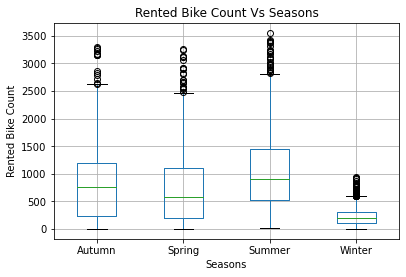

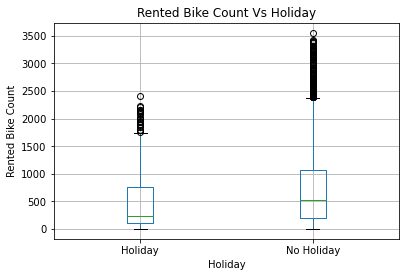

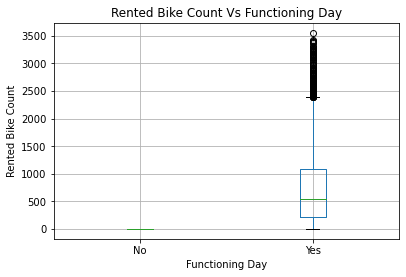

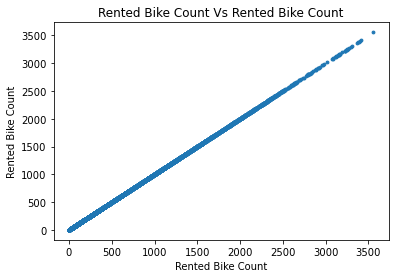

In [45]:
for i in range(len(df.columns)):
    if catcontdict[df.columns[i]] == 'Categorical':
        df[[df.columns[i], 'Rented Bike Count']].boxplot(by= df.columns[i])
        plt.title("Rented Bike Count Vs "+ str(df.columns[i]))
        plt.suptitle("")
        plt.xlabel(df.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.show()
        
    else:
        df.plot.scatter(df.columns[i],'Rented Bike Count', s=8)
        plt.xlabel(df.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.title("Rented Bike Count Vs " + str(df.columns[i]))
        plt.show()

### Grouping Data by the date to get data at day level

In [46]:
df2 = df.groupby('Date', as_index = False).mean()
df2

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,2017-12-01,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000,397.458333
1,2017-12-02,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000,355.125000
2,2017-12-03,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000,300.916667
3,2017-12-04,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000,363.708333
4,2017-12-05,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000,346.125000
...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833,715.083333
361,2018-11-27,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000,678.416667
362,2018-11-28,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000,688.500000
363,2018-11-29,11.5,3.304167,38.000000,1.212500,1596.708333,-9.808333,0.117083,0.000000,0.000000,684.291667


In [47]:
df2['Seasons'] =''
df2['Holiday'] =''
df2['Functioning Day'] = ''
for i in range(len(df2['Date'])):
    for j in range(len(df['Date'])):
        if df['Date'][j] == df2['Date'][i]:
            df2['Seasons'][i] = df['Seasons'][j]
            df2['Holiday'][i] = df['Holiday'][j]
            df2['Functioning Day'][i] = df['Functioning Day'][j]
      

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/1475652537.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Seasons'][i] = df['Seasons'][j]
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/1475652537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Holiday'][i] = df['Holiday'][j]
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/1475652537.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [48]:
df2 = df2[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','Seasons', 'Holiday', 'Functioning Day',
       'Rented Bike Count']]
df2

,Date,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Rented Bike Count
0,2017-12-01,11.5,-2.454167,45.875000,1.537500,1870.750000,-13.545833,0.248750,0.000000,0.000000,Winter,No Holiday,Yes,397.458333
1,2017-12-02,11.5,1.325000,61.958333,1.712500,1471.083333,-5.716667,0.263750,0.000000,0.000000,Winter,No Holiday,Yes,355.125000
2,2017-12-03,11.5,4.875000,81.541667,1.612500,455.750000,1.883333,0.125417,0.166667,0.000000,Winter,No Holiday,Yes,300.916667
3,2017-12-04,11.5,-0.304167,52.500000,3.450000,1362.833333,-9.925000,0.282917,0.004167,0.000000,Winter,No Holiday,Yes,363.708333
4,2017-12-05,11.5,-4.458333,36.416667,1.108333,1959.458333,-17.425000,0.035833,0.000000,0.000000,Winter,No Holiday,Yes,346.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-11-26,11.5,6.320833,70.500000,1.029167,475.000000,0.845833,0.418750,0.000000,0.120833,Autumn,No Holiday,Yes,715.083333
361,2018-11-27,11.5,7.066667,68.000000,1.350000,405.291667,1.000000,0.192500,0.000000,0.000000,Autumn,No Holiday,Yes,678.416667
362,2018-11-28,11.5,5.304167,25.791667,1.695833,1429.083333,-13.350000,0.403333,0.000000,0.000000,Autumn,No Holiday,Yes,688.500000
363,2018-11-29,11.5,3.304167,38.000000,1.212500,1596.708333,-9.808333,0.117083,0.000000,0.000000,Autumn,No Holiday,Yes,684.291667


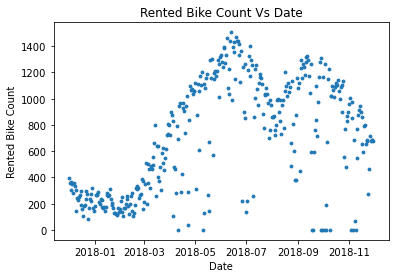

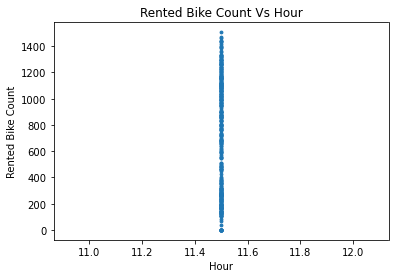

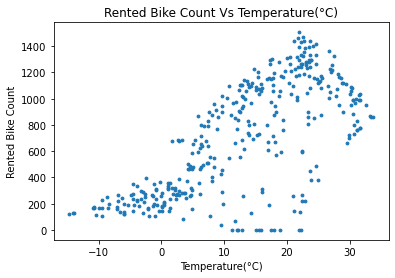

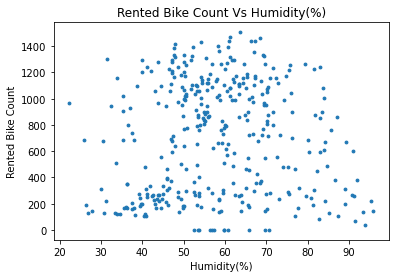

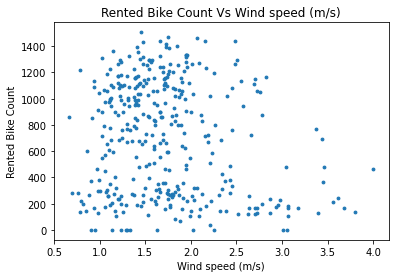

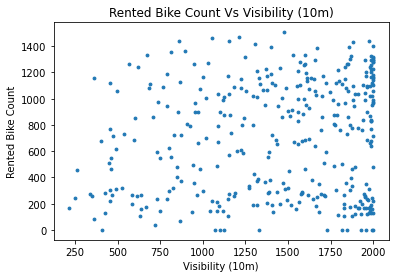

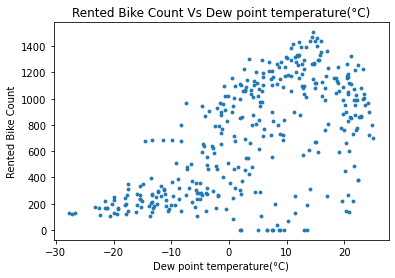

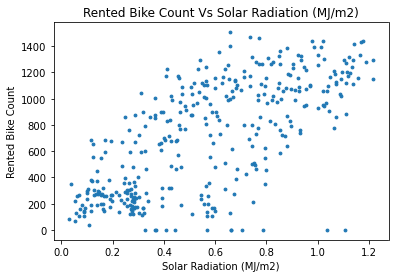

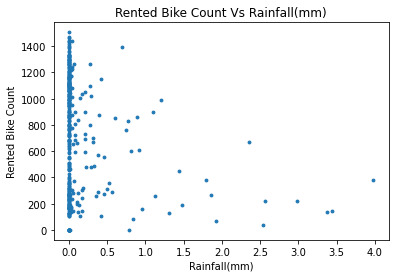

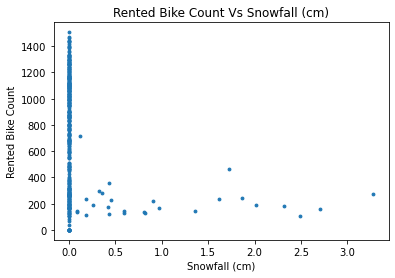

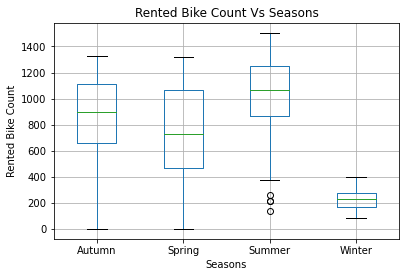

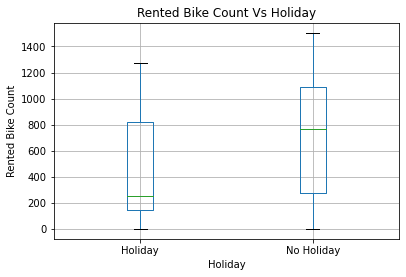

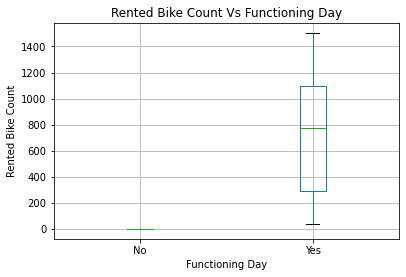

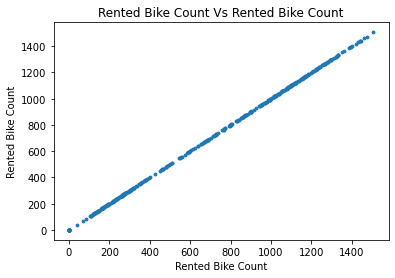

In [49]:
for i in range(len(df2.columns)):
    if catcontdict[df2.columns[i]] == 'Categorical':
        df2[[df2.columns[i], 'Rented Bike Count']].boxplot(by= df2.columns[i])
        plt.title("Rented Bike Count Vs "+ str(df2.columns[i]))
        plt.suptitle("")
        plt.xlabel(df2.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.show()
        
    else:
        df2.plot.scatter(df2.columns[i],'Rented Bike Count', s=8)
        plt.xlabel(df2.columns[i])
        plt.ylabel("Rented Bike Count")
        plt.title("Rented Bike Count Vs " + str(df.columns[i]))
        plt.show()

### Grouping Data by month to get data at monthly level

In [50]:
df3 = df2
df3['Year'] = df2['Date'].dt.year
df3['Month'] = df2['Date'].dt.month
df3 = df3[['Date',  'Year', 'Month','Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Rented Bike Count']]

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/3304891761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Year'] = df2['Date'].dt.year
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/3304891761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Month'] = df2['Date'].dt.month


In [51]:
df_month = df3.groupby('Month', as_index = False).mean()
df_month

,Month,Year,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,1,2018.0,11.5,-3.943145,48.081989,1.872581,1459.887097,-13.913844,0.226747,0.011425,0.255376,201.620968
1,2,2018.0,11.5,-1.664732,44.854167,2.182887,1556.528274,-13.053274,0.481667,0.041071,0.102083,225.941964
2,3,2018.0,11.5,8.044489,59.295699,1.921774,1143.004032,-0.270699,0.600013,0.069220,0.000000,511.551075
3,4,2018.0,11.5,12.948056,54.611111,1.985972,1327.868056,2.520556,0.712764,0.180972,0.000000,728.093056
4,5,2018.0,11.5,18.144355,62.288978,1.719624,1253.044355,10.058737,0.754355,0.298387,0.000000,950.387097
5,6,2018.0,11.5,23.136806,62.618056,1.675833,1244.911111,14.775972,0.836931,0.238194,0.000000,1245.676389
6,7,2018.0,11.5,27.763978,67.447581,1.454167,1538.481183,20.576478,0.754167,0.249462,0.000000,987.177419
7,8,2018.0,11.5,28.736425,64.802419,1.700403,1713.559140,20.769758,0.695108,0.272312,0.000000,876.192204
8,9,2018.0,11.5,21.498750,60.700000,1.554028,1816.797222,12.908194,0.654111,0.095139,0.000000,935.572222
9,10,2018.0,11.5,13.089113,59.258065,1.543414,1674.366935,4.553091,0.542124,0.161962,0.000000,874.563172


In [52]:
df_month['Month Name'] = ''
for i in range(len(df_month['Month'])):
    if df_month['Month'][i] == 1:
        df_month['Month Name'][i] = 'Jan'
    
    if df_month['Month'][i] == 2:
        df_month['Month Name'][i] = 'Feb'
        
    if df_month['Month'][i] == 3:
        df_month['Month Name'][i] = 'Mar'
        
    if df_month['Month'][i] == 4:
        df_month['Month Name'][i] = 'Apr'
        
    if df_month['Month'][i] == 5:
        df_month['Month Name'][i] = 'May'
        
    if df_month['Month'][i] == 6:
        df_month['Month Name'][i] = 'Jun'
        
    if df_month['Month'][i] == 7:
        df_month['Month Name'][i] = 'Jul'
        
    if df_month['Month'][i] == 8:
        df_month['Month Name'][i] = 'Aug'
        
    if df_month['Month'][i] == 9:
        df_month['Month Name'][i] = 'Sep'
        
    if df_month['Month'][i] == 10:
        df_month['Month Name'][i] = 'Oct'
        
    if df_month['Month'][i] == 11:
        df_month['Month Name'][i] = 'Nov'
        
    if df_month['Month'][i] == 12:
        df_month['Month Name'][i] = 'Dec'
              
df_month

/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/453134198.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month Name'][i] = 'Jan'
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/453134198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_month['Month Name'][i] = 'Feb'
/var/folders/7c/kfk054ws5hl38f7c6tkg7hs40000gn/T/ipykernel_43004/453134198.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Month,Year,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Month Name
0,1,2018.0,11.5,-3.943145,48.081989,1.872581,1459.887097,-13.913844,0.226747,0.011425,0.255376,201.620968,Jan
1,2,2018.0,11.5,-1.664732,44.854167,2.182887,1556.528274,-13.053274,0.481667,0.041071,0.102083,225.941964,Feb
2,3,2018.0,11.5,8.044489,59.295699,1.921774,1143.004032,-0.270699,0.600013,0.069220,0.000000,511.551075,Mar
3,4,2018.0,11.5,12.948056,54.611111,1.985972,1327.868056,2.520556,0.712764,0.180972,0.000000,728.093056,Apr
4,5,2018.0,11.5,18.144355,62.288978,1.719624,1253.044355,10.058737,0.754355,0.298387,0.000000,950.387097,May
5,6,2018.0,11.5,23.136806,62.618056,1.675833,1244.911111,14.775972,0.836931,0.238194,0.000000,1245.676389,Jun
6,7,2018.0,11.5,27.763978,67.447581,1.454167,1538.481183,20.576478,0.754167,0.249462,0.000000,987.177419,Jul
7,8,2018.0,11.5,28.736425,64.802419,1.700403,1713.559140,20.769758,0.695108,0.272312,0.000000,876.192204,Aug
8,9,2018.0,11.5,21.498750,60.700000,1.554028,1816.797222,12.908194,0.654111,0.095139,0.000000,935.572222,Sep
9,10,2018.0,11.5,13.089113,59.258065,1.543414,1674.366935,4.553091,0.542124,0.161962,0.000000,874.563172,Oct


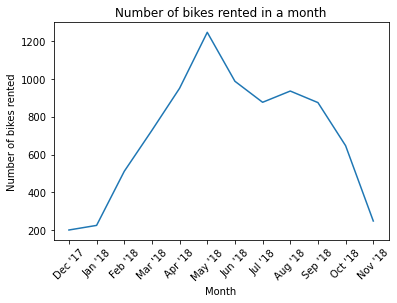

In [53]:
plt.plot(df_month['Month Name'],df_month['Rented Bike Count'])
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ["Dec '17", "Jan '18", "Feb '18", "Mar '18", "Apr '18", "May '18", "Jun '18", 
          "Jul '18", "Aug '18", "Sep '18", "Oct '18", "Nov '18"]
plt.title('Number of bikes rented in a month')
plt.xlabel('Month')
plt.xticks(positions, labels, rotation = 45)
plt.ylabel('Number of bikes rented')
plt.show()

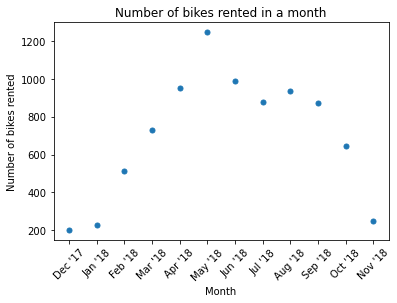

In [54]:
df_month.plot.scatter('Month Name', 'Rented Bike Count', s=25)
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ["Dec '17", "Jan '18", "Feb '18", "Mar '18", "Apr '18", "May '18", "Jun '18", 
          "Jul '18", "Aug '18", "Sep '18", "Oct '18", "Nov '18"]
plt.title('Number of bikes rented in a month')
plt.xlabel('Month')
plt.xticks(positions, labels, rotation = 45)
plt.ylabel('Number of bikes rented')
plt.show()

# Data Splitting

In [55]:
X = df.iloc[: , 0:13]
y = df.iloc[: , 13:14]

In [56]:
from sklearn.model_selection import train_test_split 
random_state = 13
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_state)
print('training set:',X_train.shape, y_train.shape) 
print(X_other.shape, y_other.shape) 

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)
print('validation set:',X_val.shape, y_val.shape) 
print('test set:',X_test.shape, y_test.shape) 

training set: (7008, 13) (7008, 1)
(1752, 13) (1752, 1)
validation set: (876, 13) (876, 1)
test set: (876, 13) (876, 1)


 # Data Preprocessing

In [57]:
# collect which encoder to use on each feature
# needs to be done manually
onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)


(7008, 13)
(7008, 17)
[[ 0.          0.          0.         ... -0.65878351 -0.12614458
  -0.16793832]
 [ 0.          0.          1.         ... -0.65878351 -0.12614458
  -0.16793832]
 [ 0.          1.          0.         ... -0.60147424 -0.12614458
  -0.16793832]
 ...
 [ 1.          0.          0.         ...  1.00318543 -0.12614458
  -0.16793832]
 [ 0.          0.          0.         ... -0.65878351 -0.12614458
  -0.16793832]
 [ 0.          0.          0.         ... -0.65878351 -0.12614458
  -0.16793832]]


# Choosing Evaluation Metric

RMSE

# ML Models

### Lasso

In [58]:
random_states = [0,13,33,86,150]
alpha = np.logspace(-10,10,50)

lasso_thetas = []
lasso_models = []
lasso_train_RMSE = np.zeros((len(random_states),len(alpha)))
lasso_test_RMSE = np.zeros((len(random_states),len(alpha)))
lasso_val_RMSE = np.zeros((len(random_states),len(alpha)))
baseline_score_test = np.zeros(len(random_states))
baseline_score_val = np.zeros(len(random_states))
std_test_RMSE = np.zeros(len(random_states))

# do the fit
for n in range(len(random_states)):
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_states[n])
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_states[n])
    
    onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
    std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

    # collect all the encoders
    preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    for i in range(len(alpha)):
        # load the linear regression model
        lin_reg = Lasso(alpha=alpha[i],max_iter=100000000)
        lin_reg.fit(X_train_prep, y_train)
        lasso_thetas.append(lin_reg.coef_)
        lasso_models.append(lin_reg)
        lasso_train_RMSE[n,i] = np.sqrt(mean_squared_error(y_train,lin_reg.predict(X_train_prep)))
        lasso_test_RMSE[n,i] = np.sqrt(mean_squared_error(y_test,lin_reg.predict(X_test_prep)))
        lasso_val_RMSE[n,i] = np.sqrt(mean_squared_error(y_val,lin_reg.predict(X_val_prep)))
        
        
        
    mean_y_train = np.full(shape=len(y_train), fill_value=np.mean(y_train))
    mean_y_test = np.full(shape=len(y_test), fill_value=np.mean(y_test))
    mean_y_val = np.full(shape=len(y_val), fill_value=np.mean(y_val))
    
    baseline_score_test[n] = np.sqrt(mean_squared_error(y_test,mean_y_test))
    baseline_score_val[n] = np.sqrt(mean_squared_error(y_val,mean_y_val))
    
    std_test_RMSE[n] = np.std(lasso_test_RMSE[n])
    

print("Baseline Score (Test):", baseline_score_test)
print("Baseline Score (Validation):", baseline_score_val)
print("Std deviation of test RMSE:", std_test_RMSE)

Baseline Score (Test): [649.5456035  637.46466129 642.91814153 662.33420702 608.21817257]
Baseline Score (Validation): [644.14120072 670.21682717 635.45948033 645.28017165 634.76572879]
Std deviation of test RMSE: [ 97.26088128  99.79523118  97.40794279 103.05037501 100.44890212]


In [59]:
#Determining the best test score and the corresponding alpha value
best_test_scores = lasso_test_RMSE.min(axis =1)
print("Best Test Scores:", best_test_scores)
best_val_scores = lasso_val_RMSE.min(axis =1)
print("Best Val Scores:", best_val_scores)
print("Best Params:", alpha[lasso_test_RMSE.argmin(axis =1)])

Best Test Scores: [445.32896734 428.11580837 438.46340288 445.97042473 397.63222385]
Best Val Scores: [427.66656684 442.68667606 421.26073654 439.39811307 424.82157696]
Best Params: [1.45634848e-02 1.45634848e-02 1.59985872e+00 1.00000000e-10
 1.00000000e-10]


In [60]:
#Determining the std deviations above/below the baseline
(best_test_scores - baseline_score_test)/std_test_RMSE

array([-2.09967906, -2.09778414, -2.09895346, -2.09959238, -2.09644849])

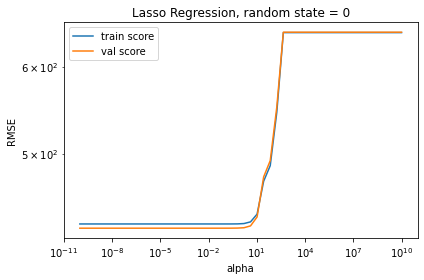

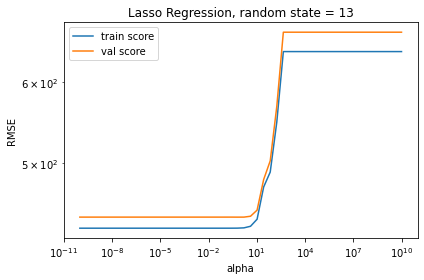

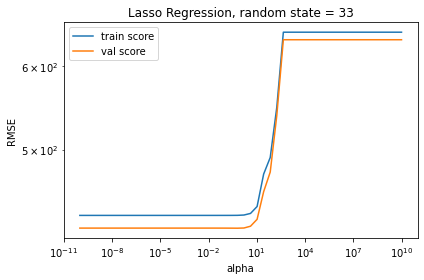

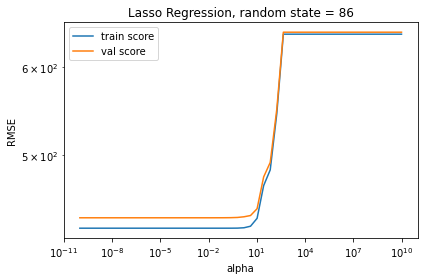

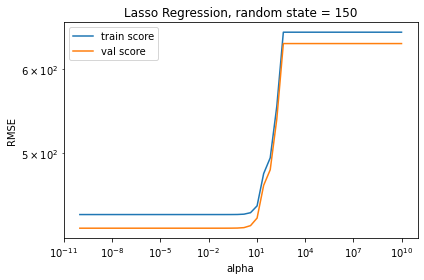

In [61]:
#Plotting train and validation scores
for i in range(len(random_states)):
    plt.plot(alpha,lasso_train_RMSE[i],label='train score')
    plt.plot(alpha,lasso_val_RMSE[i],label='val score')
    plt.semilogy()
    plt.semilogx()
    plt.xlabel('alpha')
    plt.ylabel('RMSE')
    plt.title('Lasso Regression, random state = ' + str(random_states[i]))
    plt.legend()
    plt.tight_layout()
    plt.savefig('RMSE_lasso'+ str(i)+'.png',dpi=300)
    plt.show()

### Ridge 

In [62]:
random_states = [0,13,33,86,150]
alpha = np.logspace(-10,10,50)

ridge_train_RMSE = np.zeros((len(random_states),len(alpha)))
ridge_test_RMSE = np.zeros((len(random_states),len(alpha)))
ridge_val_RMSE = np.zeros((len(random_states),len(alpha)))
baseline_score_test = np.zeros(len(random_states))
baseline_score_val = np.zeros(len(random_states))
ridge_std_test_RMSE = np.zeros(len(random_states))

# do the fit
for n in range(len(random_states)):
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_states[n])
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_states[n])
    
    onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
    std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

    # collect all the encoders
    preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    for i in range(len(alpha)):
        # load the linear regression model
        ridge_lin_reg = Ridge(alpha=alpha[i])
        ridge_lin_reg.fit(X_train_prep, y_train)

        ridge_train_RMSE[n,i] = np.sqrt(mean_squared_error(y_train,ridge_lin_reg.predict(X_train_prep)))
        ridge_test_RMSE[n,i] = np.sqrt(mean_squared_error(y_test,ridge_lin_reg.predict(X_test_prep)))
        ridge_val_RMSE[n,i] = np.sqrt(mean_squared_error(y_val,ridge_lin_reg.predict(X_val_prep)))
    
          
    mean_y_train = np.full(shape=len(y_train), fill_value=np.mean(y_train))
    mean_y_test = np.full(shape=len(y_test), fill_value=np.mean(y_test))
    mean_y_val = np.full(shape=len(y_val), fill_value=np.mean(y_val))
    
    baseline_score_test[n] = np.sqrt(mean_squared_error(y_test,mean_y_test))
    baseline_score_val[n] = np.sqrt(mean_squared_error(y_val,mean_y_val))
    
    ridge_std_test_RMSE[n] = np.std(ridge_test_RMSE[n])
        

print("Baseline Score (Test):", baseline_score_test)
print("Baseline Score (Validation):", baseline_score_val)
print("Std deviation of test RMSE:", ridge_std_test_RMSE)

Baseline Score (Test): [649.5456035  637.46466129 642.91814153 662.33420702 608.21817257]
Baseline Score (Validation): [644.14120072 670.21682717 635.45948033 645.28017165 634.76572879]
Std deviation of test RMSE: [87.72949918 89.8277103  87.62721508 93.05867243 90.34492922]


In [63]:
#Determining the best test score and the corresponding alpha value
best_test_scores = ridge_test_RMSE.min(axis =1)
print("Best Test Scores:", best_test_scores)
best_val_scores = ridge_val_RMSE.min(axis =1)
print("Best Val Scores:", best_val_scores)
print("Best Params:", alpha[ridge_test_RMSE.argmin(axis =1)])

Best Test Scores: [445.32985566 428.11510809 438.68472014 445.97042473 397.63222385]
Best Val Scores: [427.6623916  442.71739893 421.3421985  439.39811307 424.78676448]
Best Params: [1.00000000e-10 1.59985872e+00 1.04811313e+01 1.00000000e-10
 1.00000000e-10]


In [64]:
#Determining the std deviations above/below the baseline
(best_test_scores - baseline_score_test)/ridge_std_test_RMSE

array([-2.32778883, -2.33056762, -2.33070766, -2.32502546, -2.33091055])

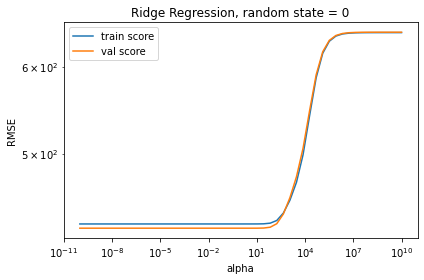

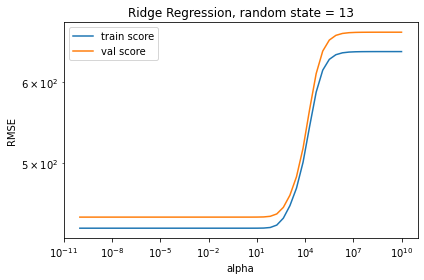

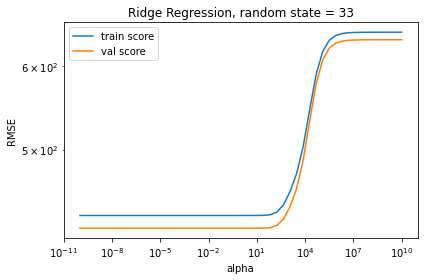

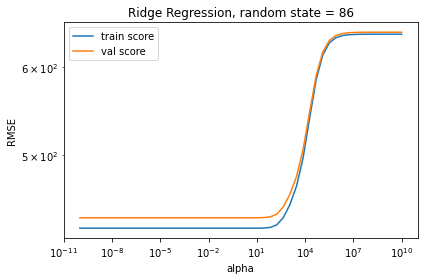

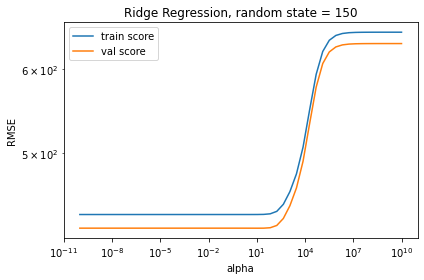

In [65]:
#Plotting train and validation scores
for i in range(len(random_states)):
    plt.plot(alpha,ridge_train_RMSE[i],label='train score')
    plt.plot(alpha,ridge_val_RMSE[i],label='val score')
    plt.semilogy()
    plt.semilogx()
    plt.xlabel('alpha')
    plt.ylabel('RMSE')
    plt.title('Ridge Regression, random state = ' + str(random_states[i]))
    plt.legend()
    plt.tight_layout()
    plt.savefig('RMSE_ridge'+ str(i)+'.png',dpi=300)
    plt.show()

### Random Forest

In [66]:
random_states = [0,13,33,86,150]
max_depth = np.array([1,3,10,30,100])

rf_train_RMSE = np.zeros((len(random_states),len(max_depth)))
rf_test_RMSE = np.zeros((len(random_states),len(max_depth)))
rf_val_RMSE = np.zeros((len(random_states),len(max_depth)))
baseline_score_test = np.zeros(len(random_states))
baseline_score_val = np.zeros(len(random_states))
rf_std_test_RMSE = np.zeros(len(random_states))

# do the fit
for n in range(len(random_states)):
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_states[n])
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_states[n])
    
    onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
    std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

    # collect all the encoders
    preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    for i in range(len(max_depth)):
        # load the linear regression model
        rf_reg = RandomForestRegressor(max_depth= max_depth[i], random_state = 0)
        rf_reg.fit(X_train_prep, y_train.squeeze())


        rf_train_RMSE[n,i] = np.sqrt(mean_squared_error(y_train,rf_reg.predict(X_train_prep)))
        rf_test_RMSE[n,i] = np.sqrt(mean_squared_error(y_test,rf_reg.predict(X_test_prep)))
        rf_val_RMSE[n,i] = np.sqrt(mean_squared_error(y_val,rf_reg.predict(X_val_prep)))
          
    mean_y_train = np.full(shape=len(y_train), fill_value=np.mean(y_train))
    mean_y_test = np.full(shape=len(y_test), fill_value=np.mean(y_test))
    mean_y_val = np.full(shape=len(y_val), fill_value=np.mean(y_val))
    
    baseline_score_test[n] = np.sqrt(mean_squared_error(y_test,mean_y_test))
    baseline_score_val[n] = np.sqrt(mean_squared_error(y_val,mean_y_val))
    
    rf_std_test_RMSE[n] = np.std(rf_test_RMSE[n])
    
    
print("Baseline Score (Test):", baseline_score_test)
print("Baseline Score (Validation):", baseline_score_val)
print("Std deviation of test RMSE:", rf_std_test_RMSE)

Baseline Score (Test): [649.5456035  637.46466129 642.91814153 662.33420702 608.21817257]
Baseline Score (Validation): [644.14120072 670.21682717 635.45948033 645.28017165 634.76572879]
Std deviation of test RMSE: [126.80555047 127.50270361 127.01593723 138.57844745 116.14946035]


In [67]:
#Determining the best test score and the corresponding alpha value
best_test_scores = rf_test_RMSE.min(axis =1)
print("Best Test Scores:", best_test_scores)
best_val_scores = rf_val_RMSE.min(axis =1)
print("Best Val Scores:", best_val_scores)
print("Best Params:", max_depth[rf_test_RMSE.argmin(axis =1)])

Best Test Scores: [249.44105556 233.64439692 235.61765206 237.14349285 222.02626856]
Best Val Scores: [218.1119304  244.29695442 227.36451482 240.23376066 250.53418074]
Best Params: [100 100 100  30  30]


In [68]:
#Determining the std deviations above/below the baseline
(best_test_scores) - (baseline_score_test)/rf_std_test_RMSE

array([244.31868038, 228.6447801 , 230.55593969, 232.36400355,
       216.78975545])

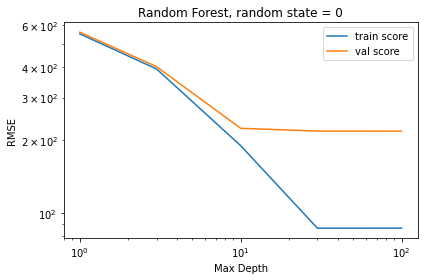

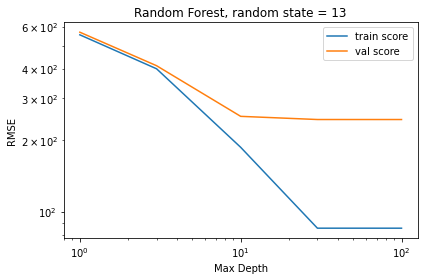

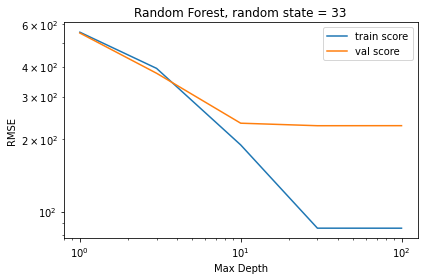

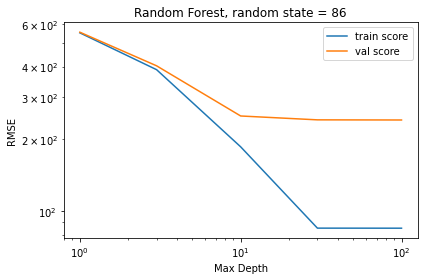

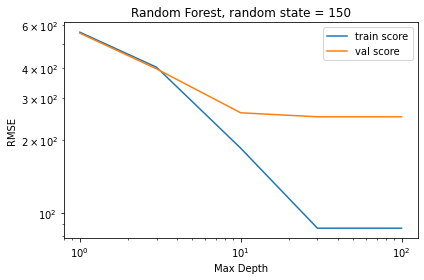

In [69]:
#Plotting train and validation scores
for i in range(len(random_states)):
    plt.plot(max_depth,rf_train_RMSE[i],label='train score')
    plt.plot(max_depth,rf_val_RMSE[i],label='val score')
    plt.semilogy()
    plt.semilogx()
    plt.xlabel('Max Depth')
    plt.ylabel('RMSE')
    plt.title('Random Forest, random state = ' + str(random_states[i]))
    plt.legend()
    plt.tight_layout()
    plt.savefig('RMSE_rf'+ str(i)+'.png',dpi=300)
    plt.show()

### KNN

In [70]:
random_states = [0,13,33,86,150]
n_neighbors = np.array([1,3,10,30, 100, 500])

knn_train_RMSE = np.zeros((len(random_states),len(n_neighbors)))
knn_test_RMSE = np.zeros((len(random_states),len(n_neighbors)))
knn_val_RMSE = np.zeros((len(random_states),len(n_neighbors)))
baseline_score_test = np.zeros(len(random_states))
baseline_score_val = np.zeros(len(random_states))
knn_std_test_RMSE = np.zeros(len(random_states))

# do the fit
for n in range(len(random_states)):
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=random_states[n])
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_states[n])
    
    onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
    std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

    # collect all the encoders
    preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)

    for i in range(len(n_neighbors)):
        knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors[i], weights = 'distance')
        knn_reg.fit(X_train_prep, y_train)

        knn_train_RMSE[n,i] = np.sqrt(mean_squared_error(y_train,knn_reg.predict(X_train_prep)))
        knn_test_RMSE[n,i] = np.sqrt(mean_squared_error(y_test,knn_reg.predict(X_test_prep)))
        knn_val_RMSE[n,i] = np.sqrt(mean_squared_error(y_val,knn_reg.predict(X_val_prep)))

          
    mean_y_train = np.full(shape=len(y_train), fill_value=np.mean(y_train))
    mean_y_test = np.full(shape=len(y_test), fill_value=np.mean(y_test))
    mean_y_val = np.full(shape=len(y_val), fill_value=np.mean(y_val))
    
    baseline_score_test[n] = np.sqrt(mean_squared_error(y_test,mean_y_test))
    baseline_score_val[n] = np.sqrt(mean_squared_error(y_val,mean_y_val))
    
    knn_std_test_RMSE[n] = np.std(knn_test_RMSE[n])
    
    

print("Baseline Score (Test):", baseline_score_test)
print("Baseline Score (Validation):", baseline_score_val)
print("Std deviation of test RMSE:", knn_std_test_RMSE)

Baseline Score (Test): [649.5456035  637.46466129 642.91814153 662.33420702 608.21817257]
Baseline Score (Validation): [644.14120072 670.21682717 635.45948033 645.28017165 634.76572879]
Std deviation of test RMSE: [39.57987759 36.04073051 37.8986422  44.25093243 34.1738695 ]


In [71]:
#Determining the best test score and the corresponding alpha value
best_test_scores = knn_test_RMSE.min(axis =1)
print("Best Test Scores:", best_test_scores)
best_val_scores = knn_val_RMSE.min(axis =1)
print("Best Val Scores:", best_val_scores)
print("Best Params:", n_neighbors[knn_test_RMSE.argmin(axis =1)])

Best Test Scores: [311.60635226 285.31200052 293.79829139 307.57554622 281.94159772]
Best Val Scores: [293.41932882 295.47426344 296.52521016 306.90092937 299.23495985]
Best Params: [ 3 10  3  3 10]


In [72]:
#Determining the std deviations above/below the baseline
(best_test_scores - baseline_score_test)/knn_std_test_RMSE

array([-8.53815807, -9.77096346, -9.21193557, -8.01697594, -9.54754553])

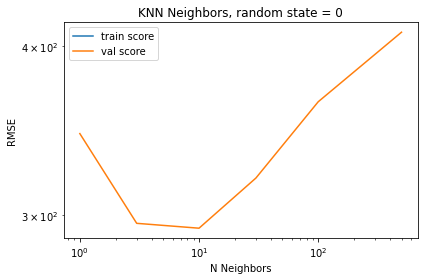

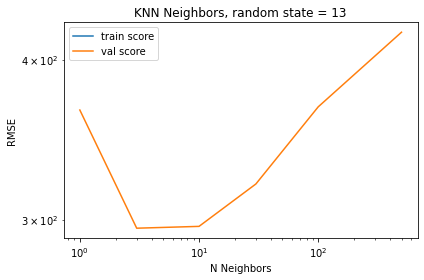

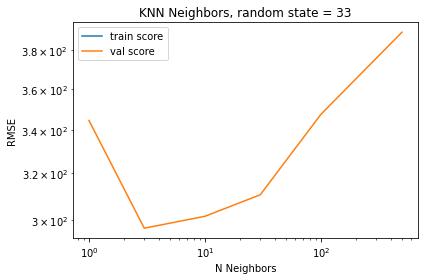

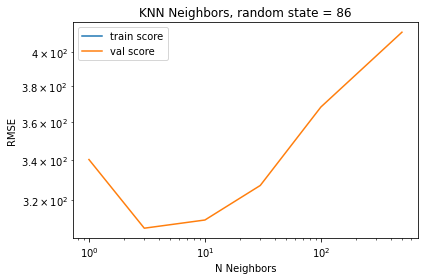

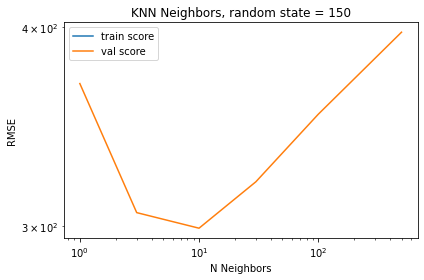

In [73]:
#Plotting train and validation scores
for i in range(len(random_states)):
    plt.plot(n_neighbors,knn_train_RMSE[i],label='train score')
    plt.plot(n_neighbors,knn_val_RMSE[i],label='val score')
    plt.semilogy()
    plt.semilogx()
    plt.xlabel('N Neighbors')
    plt.ylabel('RMSE')
    plt.title('KNN Neighbors, random state = ' + str(random_states[i]))
    plt.legend()
    plt.tight_layout()
    plt.savefig('RMSE_knn'+ str(i)+'.png',dpi=300)
    plt.show()

### XGBoost

In [74]:
random_states = [0,13,33,86,150]
max_depth = np.array([1,10,50,75,100])

xgb_train_RMSE = np.zeros((len(random_states),len(max_depth)))
xgb_test_RMSE = np.zeros((len(random_states),len(max_depth)))
xgb_val_RMSE = np.zeros((len(random_states),len(max_depth)))
baseline_score_test = np.zeros(len(max_depth))
baseline_score_val = np.zeros(len(max_depth))
xgb_std_test_RMSE = np.zeros(len(max_depth))


# do the fit
for n in range(len(random_states)):
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,random_state=0)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=0)
    
    onehot_ftrs = ["Seasons", "Holiday", "Functioning Day"]
    std_ftrs = ['Hour','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

    # collect all the encoders
    preprocessor = ColumnTransformer(
    transformers=[
        ('std', StandardScaler(), std_ftrs), 
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs)])

    clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

    X_train_prep = clf.fit_transform(X_train)
    X_val_prep = clf.transform(X_val)
    X_test_prep = clf.transform(X_test)
    
    

    for i in range(len(max_depth)):
        param_grid = {"learning_rate": [0.01],
                      "n_estimators": [10000],
                      "missing": [np.nan], 
                      "max_depth": [max_depth[i]],
                      "colsample_bytree": [0.6],              
                      "subsample": [0.5]}
        XGB = xgboost.XGBRegressor(random_state = random_states[n])
        XGB.set_params(**ParameterGrid(param_grid)[0])
        XGB.fit(X_train_prep,y_train,early_stopping_rounds=40,eval_set=[(X_val_prep, y_val)], verbose=False)


        xgb_train_RMSE[n,i] = np.sqrt(mean_squared_error(y_train,XGB.predict(X_train_prep)))
        xgb_test_RMSE[n,i] = np.sqrt(mean_squared_error(y_test,XGB.predict(X_test_prep)))
        xgb_val_RMSE[n,i] = np.sqrt(mean_squared_error(y_val,XGB.predict(X_val_prep)))

          
    mean_y_train = np.full(shape=len(y_train), fill_value=np.mean(y_train))
    mean_y_test = np.full(shape=len(y_test), fill_value=np.mean(y_test))
    mean_y_val = np.full(shape=len(y_val), fill_value=np.mean(y_val))
    
    baseline_score_test[n] = np.sqrt(mean_squared_error(y_test,mean_y_test))
    baseline_score_val[n] = np.sqrt(mean_squared_error(y_val,mean_y_val))
    
    xgb_std_test_RMSE[n] = np.std(xgb_test_RMSE[n])
    
    ftr_names = preprocessor.transformers[0][-1]+ \
                list(preprocessor.named_transformers_['onehot'].get_feature_names())
    
    scores = np.zeros((len(ftr_names),len(random_states)))
    for j in range(len(ftr_names)):
        print('shuffling '+str(ftr_names[j]))
        acc_scores = []
        for k in range(len(random_states)):
            X_test_prep = pd.DataFrame(X_test_prep, columns= ftr_names)
            X_test_shuffled = X_test_prep.copy()
    
            X_test_shuffled[ftr_names[k]] = np.random.permutation(X_test[ftr_names[k]].values)
            y_test_shuffled = XGB.predict(np.array(X_test_shuffled))
            acc_scores.append(np.sqrt(mean_squared_error(y_test_shuffled,y_test)))
            print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
            
        scores[j] = acc_scores

shuffling Hour
   shuffled test score: 442.073 +/- 0.0
   shuffled test score: 416.51 +/- 25.563
   shuffled test score: 446.929 +/- 47.814
   shuffled test score: 398.737 +/- 93.177
   shuffled test score: 369.482 +/- 101.828
shuffling Temperature(°C)
   shuffled test score: 438.028 +/- 0.0
   shuffled test score: 411.998 +/- 26.029
   shuffled test score: 443.693 +/- 49.606
   shuffled test score: 397.672 +/- 90.551
   shuffled test score: 368.63 +/- 99.666
shuffling Humidity(%)
   shuffled test score: 440.547 +/- 0.0
   shuffled test score: 412.168 +/- 28.379
   shuffled test score: 443.749 +/- 50.315
   shuffled test score: 397.248 +/- 91.573
   shuffled test score: 368.291 +/- 100.313
shuffling Wind speed (m/s)
   shuffled test score: 444.509 +/- 0.0
   shuffled test score: 414.73 +/- 29.779
   shuffled test score: 445.515 +/- 49.866
   shuffled test score: 398.393 +/- 92.337
   shuffled test score: 369.207 +/- 101.135
shuffling Visibility (10m)
   shuffled test score: 444.08 +/- 

In [75]:
print("Baseline Score (Test):", baseline_score_test)
print("Baseline Score (Validation):", baseline_score_val)
print("Std deviation of test RMSE:", xgb_std_test_RMSE)

Baseline Score (Test): [649.5456035 649.5456035 649.5456035 649.5456035 649.5456035]
Baseline Score (Validation): [644.14120072 644.14120072 644.14120072 644.14120072 644.14120072]
Std deviation of test RMSE: [37.53099561 36.47413292 37.80896761 36.57684032 37.61501259]


In [76]:
#Determining the best test score and the corresponding alpha value
best_test_scores = xgb_test_RMSE.min(axis =1)
print("Best Test Scores:", best_test_scores)
best_val_scores = xgb_val_RMSE.min(axis =1)
print("Best Val Scores:", best_val_scores)
print("Best Params:", max_depth[xgb_test_RMSE.argmin(axis =1)])

Best Test Scores: [240.00267026 241.96017866 238.2064882  242.39650369 240.98255526]
Best Val Scores: [208.74900461 207.15212761 205.77699723 207.78030541 207.62385425]
Best Params: [10 10 10 10 10]


In [77]:
#Determining the std deviations above/below the baseline
(best_test_scores - baseline_score_test)/xgb_std_test_RMSE

array([-10.91212547, -11.17464329, -10.87940617, -11.13133601,
       -10.86170175])

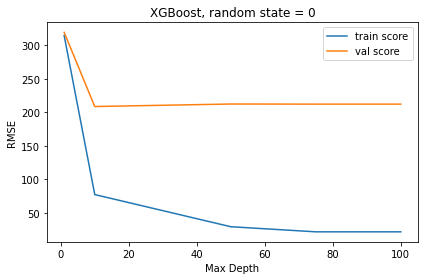

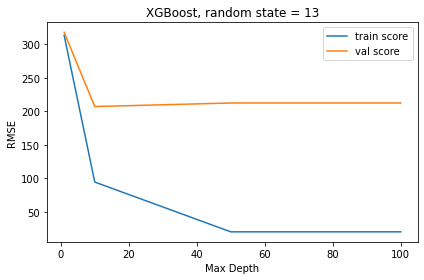

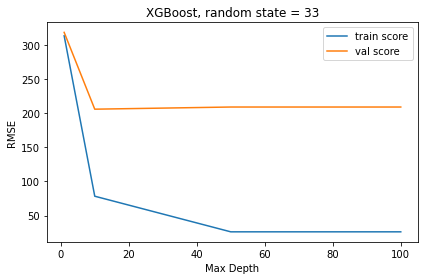

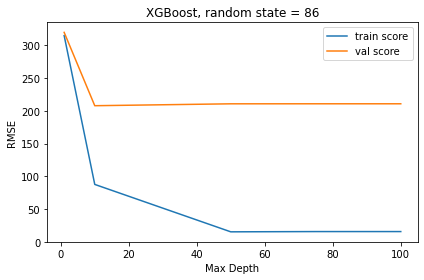

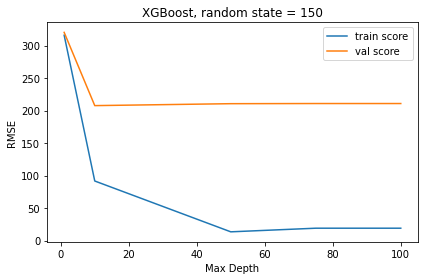

In [78]:
#Plotting train and validation scores
for i in range(len(random_states)):
    plt.plot(max_depth,xgb_train_RMSE[i],label='train score')
    plt.plot(max_depth,xgb_val_RMSE[i],label='val score')
    #plt.semilogy()
    #plt.semilogx()
    plt.xlabel('Max Depth')
    plt.ylabel('RMSE')
    plt.title('XGBoost, random state = ' + str(random_states[i]))
    plt.legend()
    plt.tight_layout()
    plt.savefig('RMSE_xgb'+ str(i)+'.png',dpi=300)
    plt.show()

# Feature Importance

No handles with labels found to put in legend.


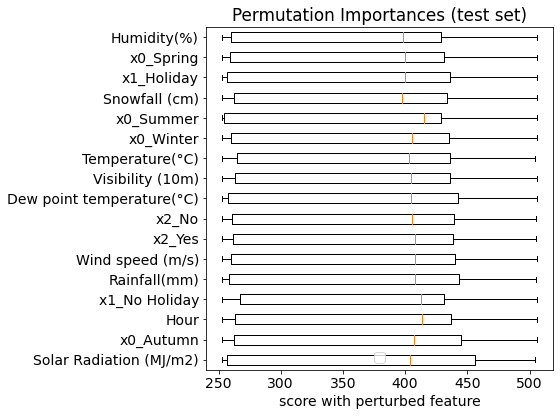

In [79]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
ftr_names = np.array(ftr_names)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot((scores[sorted_indcs].T),labels = ftr_names[sorted_indcs],vert=False)
#plt.axvline(xgb_test_RMSE,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('feature_imp1.png',dpi=300)
plt.show()

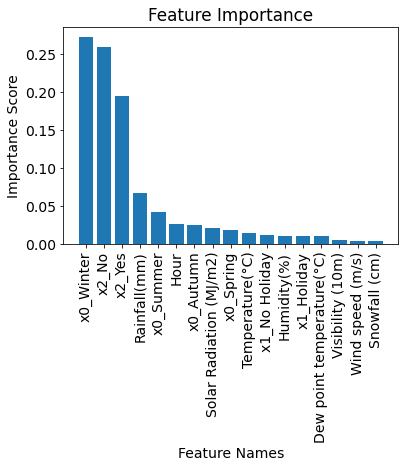

In [80]:
plt.bar(ftr_names[np.argsort(XGB.feature_importances_)[::-1]], np.sort(XGB.feature_importances_)[::-1])
plt.xticks(rotation = 90)
plt.title('Feature Importance')
plt.xlabel('Feature Names')
plt.ylabel('Importance Score')
plt.savefig('feature_imp2.png',dpi=300)
plt.show()

# SHAP

In [81]:
import shap
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test_prep)

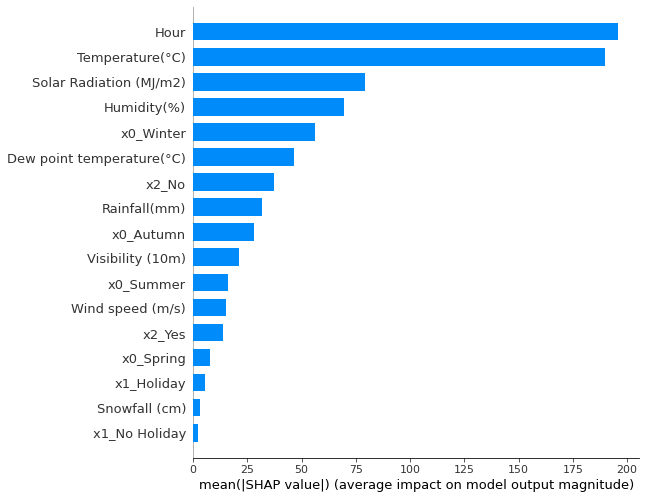

<Figure size 432x288 with 0 Axes>

In [82]:
shap.summary_plot(shap_values, X_test_prep, plot_type="bar")
plt.savefig('SHAP.png',dpi=300)